## Predictive modelling

Predictive modelling helps us in answering a simple question - "What will happen in future?" It is the process of using known results to create, process and validate a model that can be used to forecast future outcomes.It helps us in investigating the relationship between a dependent and independent variable. It indicates the significant relationships between dependent variable and independent variable and the strength of impact of multiple independent variables on a dependent variable. 

## Python libraries and predictive modelling



In [1]:
#import all the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#import data
train = pd.read_csv("modified_train.csv")
test = pd.read_csv("modified_test.csv")

## Linear model 

__Predictor: GrLivArea<br>
Target: SalePrice__<br><br>

In [3]:
train_linear = train
test_linear = test

In [4]:
target = 'SalePrice'
predictor_linear = 'GrLivArea'

In [5]:
X_train_linear = train_linear[[predictor_linear]]
y_train_linear = train_linear[[target]]
X_test_linear = test_linear[[predictor_linear]]
y_test_linear = test_linear[[target]]

In [6]:
from sklearn.linear_model import LinearRegression
regressor_linear = LinearRegression()
regressor_linear.fit(X_train_linear, y_train_linear)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [7]:
#linear regression between sale price and living area
from sklearn.cross_validation import KFold, cross_val_score

k_fold = KFold(len(y_train_linear), n_folds=100, shuffle=True, random_state=25)
clf_linear = LinearRegression()
results = cross_val_score(clf_linear, X_train_linear, y_train_linear, cv=10 )
results.mean()

C:\Users\Baby Panda\Anaconda\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


0.4996741636438167

>K-fold cross validation gives us an accuracy of 49% on the training set. So my consideration that the area of the house influences the cost the most is not accurate. There are other emajor factors deciding the price of the house

In [8]:
results_rsme_linear = cross_val_score(clf_linear, X_train_linear, y_train_linear, scoring='neg_mean_squared_error')
results_rsme_linear = np.sqrt(np.abs(results_rsme_linear))

In [9]:
linear_train_predict = regressor_linear.predict(X_train_linear[[predictor_linear]])

In [10]:
print ("The rmse value for linear regression is: " )
print (results_rsme_linear.mean())


The rmse value for linear regression is: 
56404.79362753392


In [11]:
predict_test_linear = regressor_linear.predict(X_test_linear)

In [12]:
#Making a dataframe for predicted saleprice value of the training data
prediction_linear = pd.DataFrame(predict_test_linear, columns=['Test_Linear_SalePrice'])

#Making a combined dataframe
Model_linear = pd.concat([train_linear, prediction_linear], axis=1)

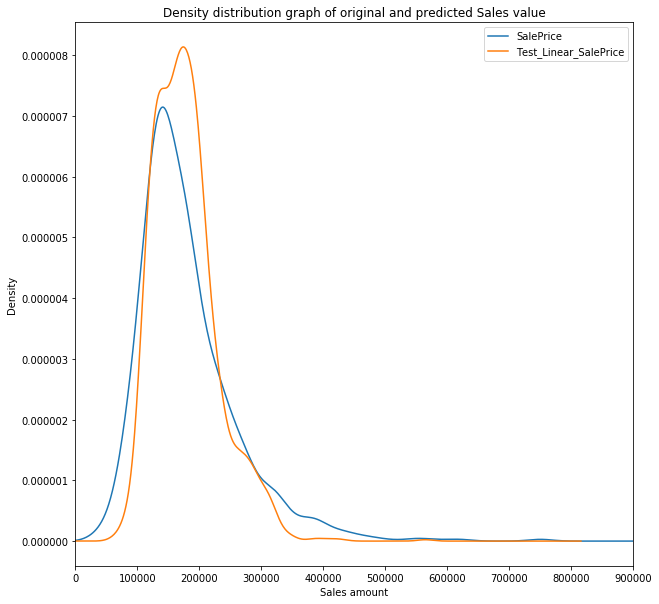

Mean of Original SalePrices:
180921.19589041095
Standard deviation of Original SalePrices:
79442.50288288663
Mean of Linear model predicted SalePrice:
177769.65890550925
Standard deviation of Linear model predicted SalePrice:
52018.870450358314


In [13]:
#Plotting the predicted Sale Price and Original Sale Price
combined_data_linear = pd.DataFrame(Model_linear[['SalePrice','Test_Linear_SalePrice']])
combined_data_linear.plot(kind="density",
              figsize=(10,10),
              xlim=(0,900000), title='Density distribution graph of original and predicted Sales value')
plt.xlabel('Sales amount')
plt.ylabel('Density')
plt.show()

print ('Mean of Original SalePrices:')
print (combined_data_linear['SalePrice'].mean())
print ('Standard deviation of Original SalePrices:')
print (combined_data_linear['SalePrice'].std())

print ('Mean of Linear model predicted SalePrice:')
print (combined_data_linear['Test_Linear_SalePrice'].mean())
print ('Standard deviation of Linear model predicted SalePrice:')
print (combined_data_linear['Test_Linear_SalePrice'].std())

<br><br>
>According to __Central Limit theorem__, given a sufficiently large sample size from the population with a finite level of variance the mean of all samples from same population will be approximately equal to the mean of the poopulation and all sample will follow a normal distribution.<br><br>
Here, considering the entire population to fit in the train data set, the mean and standard deviation of the of the sample does not have the same or approximately same standard deviation and mean as that of the population.<br><br>

<br>__<u>Linear model, Reloaded</u><br>
Predictors: Basement area and GrLiveArea__<br><br>

In [56]:
train_linear_modified = train
test_linear_modified = test

In [57]:
target = 'SalePrice'

In [60]:
X_train_linear_modified = train_linear_modified[['GrLivArea', 'TotalBsmtSF']]
y_train_linear_modified = train_linear_modified[[target]]
X_test_linear_modified = test_linear_modified[['GrLivArea', 'TotalBsmtSF']]
y_test_linear_modified = test_linear_modified[[target]]

In [61]:
from sklearn.linear_model import LinearRegression
regressor_linear = LinearRegression()
regressor_linear.fit(X_train_linear_modified, y_train_linear_modified)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [62]:
#Cross validation with basement area and living area
from sklearn.cross_validation import KFold, cross_val_score

k_fold = KFold(len(y_train_linear_modified), n_folds=100, shuffle=True, random_state=25)
clf_linear = LinearRegression()
results = cross_val_score(clf_linear, X_train_linear_modified, y_train_linear_modified, cv=10 )
results.mean()

0.6057316916811739

In [64]:
linear_train_predict = regressor_linear.predict(X_train_linear_modified)

In [65]:
predict_test_linear_modified = regressor_linear.predict(X_test_linear_modified)

>There is an improvement in the cross validation score by 11% by just adding basement area to the set of predcitors. We can say that basement area and living area, together play a very crucial role in sale price of the house. To improve this model, I will use the same predictors with ridge regression; focusing on reducing the bias.

### Ridge Model

__Predictor: Hypothesis selected factors<br>
Target: SalePrice__<br><br>

In [66]:
train_ridge = train
test_ridge = test

In [67]:
target = 'SalePrice'
#IDCol = 'Unnamed: 0'
predictor_ridge = ['GrLivArea', 'TotalBsmtSF']

In [68]:
X_train_ridge = train_ridge[predictor_ridge]
y_train_ridge= train_ridge[target]
X_test_ridge = test_ridge[predictor_ridge]
y_test_ridge = test_ridge[target]

In [86]:
#Fit training model in the linear regression model
from sklearn.linear_model import Ridge
ridge_model = Ridge(alpha=0.01, normalize=True)
ridge_model.fit(X_train_ridge, y_train_ridge)

Ridge(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=True, random_state=None, solver='auto', tol=0.001)

In [92]:
#Ridge model Cross validation with basement area and living area

from sklearn.linear_model import Ridge
from sklearn.cross_validation import KFold, cross_val_score

k_fold = KFold(len(y_train_ridge), n_folds=100, shuffle=True, random_state=25)
clf_randomForest = Ridge(alpha=0.01, normalize=True)
results = cross_val_score(clf_randomForest, X_train_ridge, y_train_ridge.ravel(), cv=10)
results.mean()

0.6058079140540841

>The cross validation attains the maximum accuracy of 60% with various values of alpha's. 

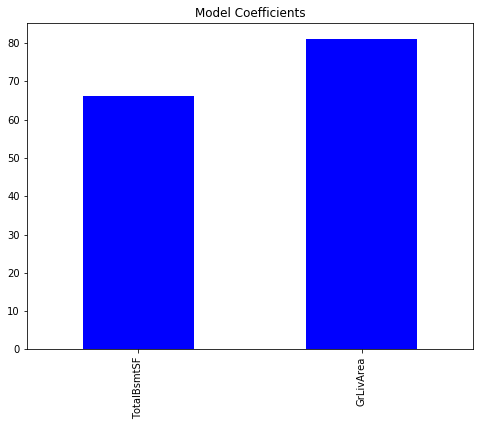

In [93]:
from pandas import Series
from sklearn import metrics
predictors_array = np.asarray(predictor_ridge)
#predictors_array.ndim

a = np.asarray(ridge_model.coef_)
d = a.ravel()
#print (predictors_array)
#s = pd.Series(d, index=predictors_array)
#print (s)
coef_ridge = pd.Series(d, predictors_array).sort_values()
coef_ridge.plot(kind='bar', 
           title='Model Coefficients',
           color = 'blue',
           figsize = (8, 6))

>Here, the coefficient explains that the basement area and living area play an almost equal role for "unit change" in sale price for "unit change" in each, keeping the other constant. The overall condition is penalized. 

In [94]:
predict_test_ridge = ridge_model.predict(X_test_ridge)

In [95]:
#Making a dataframe for predicted saleprice value of the training data
prediction_ridge = pd.DataFrame(predict_test_ridge, columns=['Train_Ridge_SalePrice'])

#Making a combined dataframe
Model_ridge = pd.concat([train_ridge, prediction_ridge], axis=1)

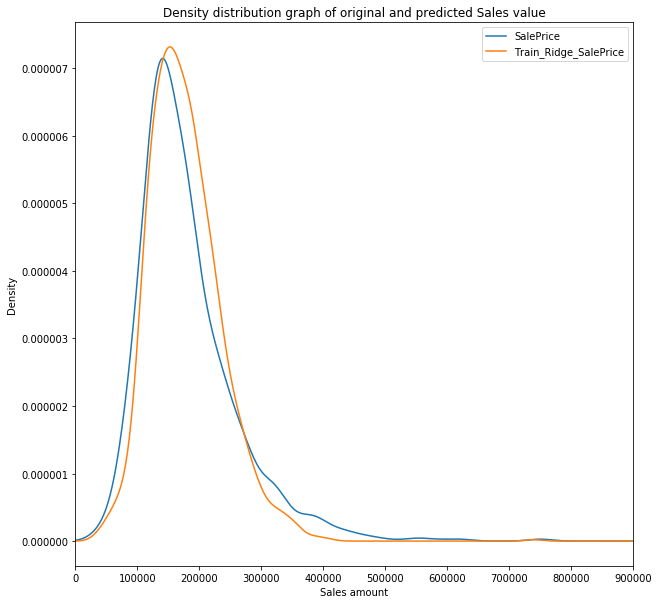

Mean of Original SalePrices:
180921.19589041095
Standard deviation of Original SalePrices:
79442.50288288663
Mean of Linear model predicted SalePrice:
177777.45434801618
Standard deviation of Linear model predicted SalePrice:
58480.72676161531


In [96]:
#Plotting the predicted Sale Price and Original Sale Price
combined_data = pd.DataFrame(Model_ridge[['SalePrice','Train_Ridge_SalePrice']])
combined_data.plot(kind="density",
              figsize=(10,10),
              xlim=(0,900000), title='Density distribution graph of original and predicted Sales value')
plt.xlabel('Sales amount') 
plt.ylabel('Density')
plt.show()

print ('Mean of Original SalePrices:')
print (combined_data['SalePrice'].mean())
print ('Standard deviation of Original SalePrices:')
print (combined_data['SalePrice'].std())

print ('Mean of Linear model predicted SalePrice:')
print (combined_data['Train_Ridge_SalePrice'].mean())
print ('Standard deviation of Linear model predicted SalePrice:')
print (combined_data['Train_Ridge_SalePrice'].std())

>The ridge model in this case fails to predict well with low rmse value, low score in cross validation and an unacceptable change in mean and standard deviation values.

<br><br>
__<u>Improved Ridge</u> 
<br>Predictor: Selected House factors
<br> Target: Sale Price__
<br><br>

In [99]:
train_ridge_all = train
test_ridge_all = test

In [100]:
target = 'SalePrice'
IDCol = 'Unnamed: 0'
predictor_ridge_all = [x for x in train_ridge_all.columns if x not in [target]+[IDCol]]

In [101]:
X_train_ridge_all = train_ridge[predictor_ridge_all]
y_train_ridge_all= train_ridge[target]
X_test_ridge_all = test_ridge[predictor_ridge_all]
y_test_ridge_all = test_ridge[target]

In [102]:
#Fit training model in the linear regression model
from sklearn.linear_model import Ridge
ridge_model_all = Ridge(alpha=0.1, normalize=True)
ridge_model_all.fit(X_train_ridge_all, y_train_ridge_all)

Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=True, random_state=None, solver='auto', tol=0.001)

In [103]:
from sklearn.linear_model import Ridge
from sklearn.cross_validation import KFold, cross_val_score

k_fold = KFold(len(y_train_ridge_all), n_folds=20, shuffle=True, random_state=25)
clf_ridge_all = Ridge(alpha=0.1, normalize=True)
results_ridge = cross_val_score(clf_ridge_all, X_train_ridge_all, y_train_ridge_all.ravel(), cv=10)
results_ridge.mean()

0.807526700503348

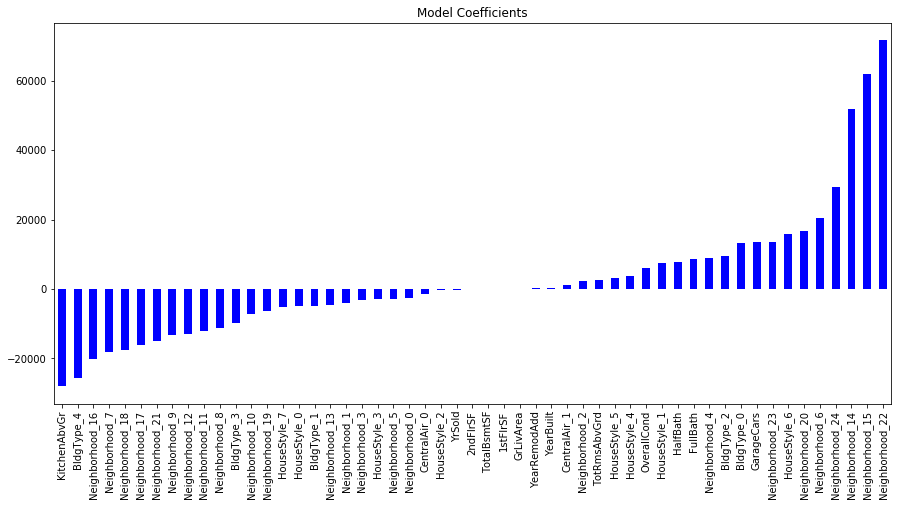

In [104]:
from pandas import Series
from sklearn import metrics
predictors_array = np.asarray(predictor_ridge_all)
#predictors_array.ndim

a = np.asarray(ridge_model_all.coef_)
d = a.ravel()
#print (predictors_array)
#s = pd.Series(d, index=predictors_array)
#print (s)
coef_ridge = pd.Series(d, predictors_array).sort_values()
coef_ridge.plot(kind='bar', 
           title='Model Coefficients',
           color = 'blue',
           figsize = (15, 7))

In [105]:
predict_test_ridge_all = ridge_model_all.predict(X_test_ridge_all)

In [106]:
#Making a dataframe for predicted saleprice value of the training data
prediction_ridge_all = pd.DataFrame(predict_test_ridge_all, columns=['Train_Ridge_all_SalePrice'])

#Making a combined dataframe
Model_ridge_all = pd.concat([train_ridge_all, prediction_ridge_all], axis=1)

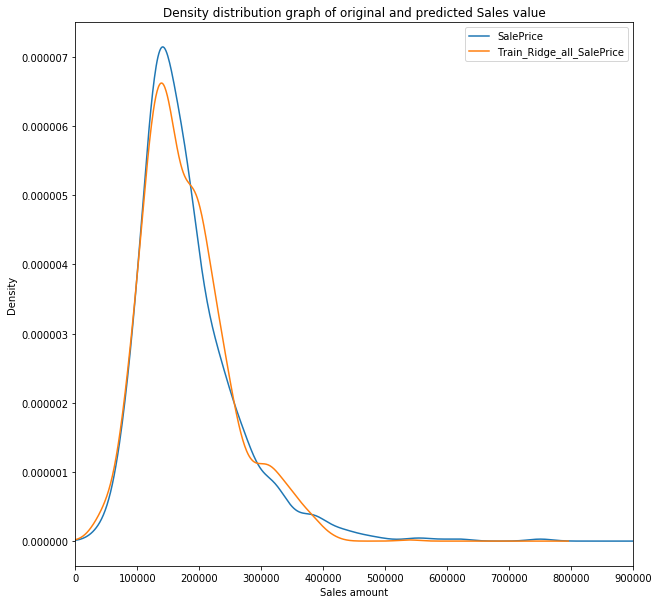

Mean of Original SalePrices:
180921.19589041095
Standard deviation of Original SalePrices:
79442.50288288663
Mean of Ridge model with all variables predicted SalePrice:
178444.94636083115
Standard deviation of Ridge model with all variables predicted SalePrice:
70395.76602006143


In [107]:
#Plotting the predicted Sale Price and Original Sale Price
combined_data = pd.DataFrame(Model_ridge_all[['SalePrice','Train_Ridge_all_SalePrice']])
combined_data.plot(kind="density",
              figsize=(10,10),
              xlim=(0,900000), title='Density distribution graph of original and predicted Sales value')
plt.xlabel('Sales amount') 
plt.ylabel('Density')
plt.show()

print ('Mean of Original SalePrices:')
print (combined_data['SalePrice'].mean())
print ('Standard deviation of Original SalePrices:')
print (combined_data['SalePrice'].std())

print ('Mean of Ridge model with all variables predicted SalePrice:')
print (combined_data['Train_Ridge_all_SalePrice'].mean())
print ('Standard deviation of Ridge model with all variables predicted SalePrice:')
print (combined_data['Train_Ridge_all_SalePrice'].std())

>The ridge model with all the variable gave the so far best cross validation score and also the predicted values for test case falls in a range of population mean and population standard deviation.

***

### Decision tree

In [32]:
train_decisionTree = train
test_decisionTree = test

In [33]:
target = 'SalePrice'
IDCol = 'Unnamed: 0'
predictor_decisionTree = [x for x in train_decisionTree.columns if x not in [target]+[IDCol]]

In [34]:
X_train_decisionTree = train_decisionTree[predictor_decisionTree]
y_train_decisionTree = train_decisionTree[[target]]
X_test_decisionTree = test_decisionTree[predictor_decisionTree]
y_test_decisionTree = test_decisionTree[[target]]

In [35]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X_train_decisionTree = sc_X.fit_transform(X_train_decisionTree)
y_train_decisionTree = sc_y.fit_transform(y_train_decisionTree)
X_test_decisionTree = sc_X.fit_transform(X_test_decisionTree)

In [36]:
from sklearn.tree import DecisionTreeRegressor
regressor_decisiontree = DecisionTreeRegressor(random_state=0, min_samples_split=18)
regressor_decisiontree.fit(X_train_decisionTree, y_train_decisionTree)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=18, min_weight_fraction_leaf=0.0,
           presort=False, random_state=0, splitter='best')

In [37]:
#Decision tree cross validation
from sklearn.cross_validation import KFold, cross_val_score

k_fold = KFold(len(y_train_decisionTree), n_folds=10, shuffle=True, random_state=25)
clf_decisionTree = DecisionTreeRegressor(random_state=0, min_samples_split=18, max_features= 18)
results = cross_val_score(clf_decisionTree, X_train_decisionTree, y_train_decisionTree.ravel(), cv=10 )
results.mean()

0.7647122513123865

In [38]:
predict_test_decisionTree= regressor_decisiontree.predict(X_test_decisionTree)

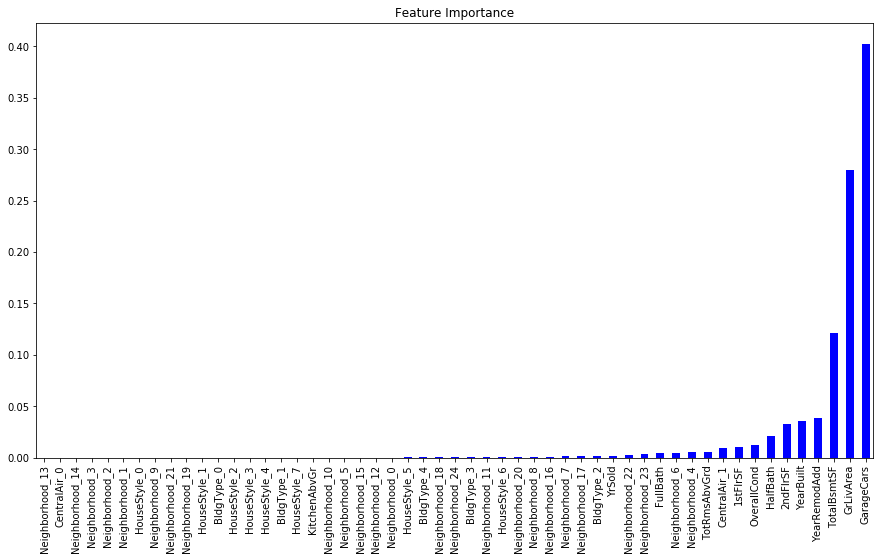

In [108]:
from pandas import Series
predictors_array = np.asarray(predictor_decisionTree)
#predictors_array.ndim
a = np.asarray(regressor_decisiontree.feature_importances_)
d = a.ravel()
#print (predictors_array)
#s = pd.Series(d, index=predictors_array)
#print (s)
coef2 = pd.Series(d, predictors_array).sort_values()
coef2.plot(kind='bar', 
           title='Feature Importance',
           color = 'blue',
           figsize = (15, 8))

In [40]:
predict_test_decisionTree = sc_y.inverse_transform(predict_test_decisionTree)

In [41]:
#Reverse Standard scalar

#Making a dataframe for predicted saleprice value of the training data
prediction_decisionTree = pd.DataFrame(predict_test_decisionTree, columns=['Train_DecisionTree_SalePrice'])

#Making a combined dataframe
Model_decisionTree = pd.concat([train_decisionTree, prediction_decisionTree], axis=1)

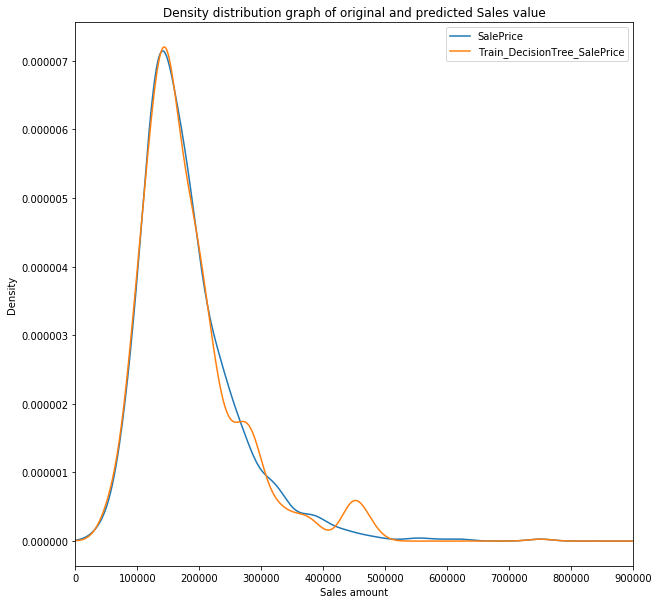

Mean of Original SalePrices:
180921.19589041095
Standard deviation of Original SalePrices:
79442.50288288663
Mean of Linear model predicted SalePrice:
183075.11149423552
Standard deviation of Linear model predicted SalePrice:
83765.16516900105


In [42]:
#Plotting the predicted Sale Price and Original Sale Price
combined_data_decisionTree = pd.DataFrame(Model_decisionTree[['SalePrice','Train_DecisionTree_SalePrice']])
combined_data_decisionTree.plot(kind="density",
              figsize=(10,10),
              xlim=(0,900000), title='Density distribution graph of original and predicted Sales value')
plt.xlabel('Sales amount')
plt.ylabel('Density')
plt.show()

print ('Mean of Original SalePrices:')
print (combined_data_decisionTree['SalePrice'].mean())
print ('Standard deviation of Original SalePrices:')
print (combined_data_decisionTree['SalePrice'].std())

print ('Mean of Linear model predicted SalePrice:')
print (combined_data_decisionTree['Train_DecisionTree_SalePrice'].mean())
print ('Standard deviation of Linear model predicted SalePrice:')
print (combined_data_decisionTree['Train_DecisionTree_SalePrice'].std())

### Random Forest

In [43]:
train_randomForest = train
test_randomForest = test

In [44]:
train_randomForest = train_randomForest.drop(['Unnamed: 0','GarageCars'], axis=1)
test_randomForest = test_randomForest.drop(['Unnamed: 0','GarageCars'], axis=1)

In [45]:
target = 'SalePrice'
#Col = ['Unnamed: 0','GarageCars']
predictor_randomForest = [x for x in train_randomForest.columns if x not in [target]]

In [46]:
print (predictor_randomForest)

['OverallCond', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'TotRmsAbvGrd', 'KitchenAbvGr', 'YrSold', 'FullBath', 'HalfBath', 'Neighborhood_0', 'Neighborhood_1', 'Neighborhood_2', 'Neighborhood_3', 'Neighborhood_4', 'Neighborhood_5', 'Neighborhood_6', 'Neighborhood_7', 'Neighborhood_8', 'Neighborhood_9', 'Neighborhood_10', 'Neighborhood_11', 'Neighborhood_12', 'Neighborhood_13', 'Neighborhood_14', 'Neighborhood_15', 'Neighborhood_16', 'Neighborhood_17', 'Neighborhood_18', 'Neighborhood_19', 'Neighborhood_20', 'Neighborhood_21', 'Neighborhood_22', 'Neighborhood_23', 'Neighborhood_24', 'BldgType_0', 'BldgType_1', 'BldgType_2', 'BldgType_3', 'BldgType_4', 'HouseStyle_0', 'HouseStyle_1', 'HouseStyle_2', 'HouseStyle_3', 'HouseStyle_4', 'HouseStyle_5', 'HouseStyle_6', 'HouseStyle_7', 'CentralAir_0', 'CentralAir_1']


In [47]:
X_train_randomForest = train_randomForest[predictor_randomForest]
y_train_randomForest = train_randomForest[[target]]
X_test_randomForest = test_randomForest[predictor_randomForest]
y_test_randomForest = test_randomForest[[target]]

In [48]:
#X_test_randomForest

In [49]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X_train_randomForest = sc_X.fit_transform(X_train_randomForest)
y_train_randomForest = sc_y.fit_transform(y_train_randomForest)
X_test_randomForest = sc_X.fit_transform(X_test_randomForest)

In [50]:
from sklearn.ensemble import RandomForestRegressor
regressor_randomForest = RandomForestRegressor(random_state=0, min_samples_split=6)
regressor_randomForest.fit(X_train_randomForest, y_train_randomForest.ravel())

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=6,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [51]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.cross_validation import KFold, cross_val_score

k_fold = KFold(len(y_train_randomForest), n_folds=10, shuffle=True, random_state=25)
clf_randomForest = RandomForestRegressor(random_state=0, min_samples_split=20)
results = cross_val_score(clf_randomForest, X_train_randomForest, y_train_randomForest.ravel(), cv=10 )
results.mean()

0.8138167254914869

In [52]:
predict_test_randomForest = regressor_randomForest.predict(X_test_randomForest)

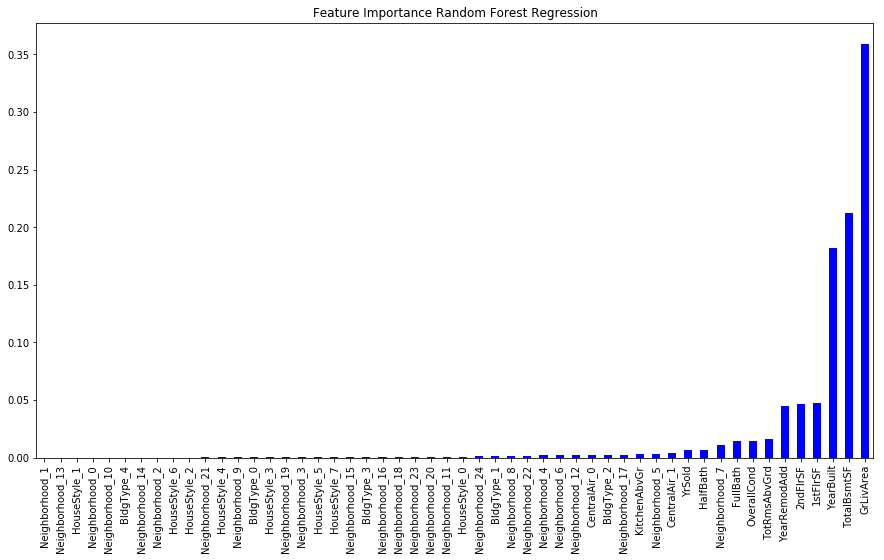

In [109]:
from pandas import Series
predictors_array = np.asarray(predictor_randomForest)
a = np.asarray(regressor_randomForest.feature_importances_)
d = a.ravel()

randomForest_coef = pd.Series(d, predictors_array).sort_values()
randomForest_coef.plot(kind='bar', 
           title='Feature Importance Random Forest Regression',
           color = 'blue',
           figsize = (15, 8))

In [54]:
#Reverse Standard scalar
predict_test_randomForest = sc_y.inverse_transform(predict_test_randomForest)

#Making a dataframe for predicted saleprice value of the training data
prediction_randomForest = pd.DataFrame(predict_test_randomForest, columns=['Train_randomForest_SalePrice'])

#Making a combined dataframe
Model_decisionTree = pd.concat([train_randomForest, prediction_randomForest], axis=1)

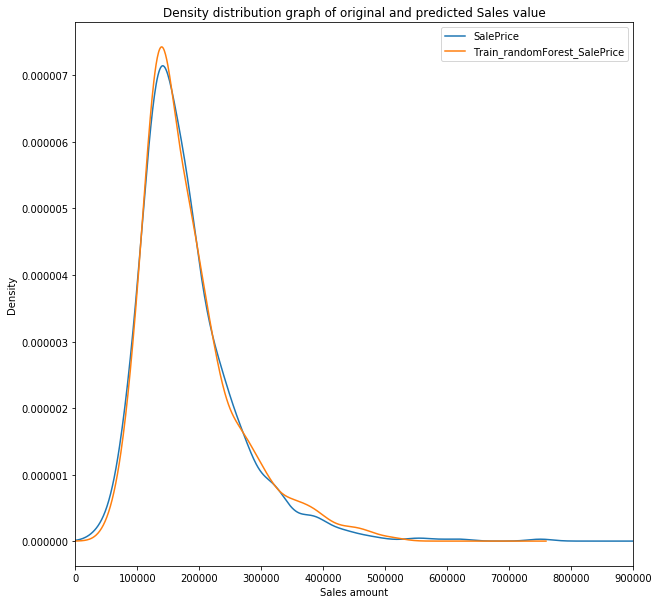

Mean of Original SalePrices:
180921.19589041095
Standard deviation of Original SalePrices:
79442.50288288663
Mean of Linear model predicted SalePrice:
183459.4385479877
Standard deviation of Linear model predicted SalePrice:
77323.46858766263


In [55]:
#Plotting the predicted Sale Price and Original Sale Price
combined_data_randomForest = pd.DataFrame(Model_decisionTree[['SalePrice','Train_randomForest_SalePrice']])
combined_data_randomForest.plot(kind="density",
              figsize=(10,10),
              xlim=(0,900000), title='Density distribution graph of original and predicted Sales value')
plt.xlabel('Sales amount')
plt.ylabel('Density')
plt.show()

print ('Mean of Original SalePrices:')
print (combined_data_randomForest['SalePrice'].mean())
print ('Standard deviation of Original SalePrices:')
print (combined_data_randomForest['SalePrice'].std())

print ('Mean of Linear model predicted SalePrice:')
print (combined_data_randomForest['Train_randomForest_SalePrice'].mean())
print ('Standard deviation of Linear model predicted SalePrice:')
print (combined_data_randomForest['Train_randomForest_SalePrice'].std())

## Linear regression reloaded


In [118]:
train_linear_reloaded = train
test_linear_reloaded = test

In [127]:
X_train_linear_reloaded = train_linear_reloaded[['GrLivArea', 'TotalBsmtSF', 'GarageCars']]
y_train_linear_reloaded = train_linear_reloaded[['SalePrice']]
X_test_linear_reloaded = test_linear_reloaded[['GrLivArea', 'TotalBsmtSF', 'GarageCars']]
y_test_linear_reloaded = test_linear_reloaded[['SalePrice']]

In [128]:
from sklearn.linear_model import LinearRegression
regressor_linear = LinearRegression()
regressor_linear.fit(X_train_linear_reloaded, y_train_linear_reloaded)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [129]:
#Cross validation with garage cars, basement area and living area
from sklearn.cross_validation import KFold, cross_val_score

k_fold = KFold(len(y_train_linear_reloaded), n_folds=100, shuffle=True, random_state=25)
clf_linear = LinearRegression()
results = cross_val_score(clf_linear, X_train_linear_reloaded, y_train_linear_reloaded, cv=10 )
results.mean()

0.6775406232918981